# Předpokládaná délka života

## Předzpracování dat

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ParameterGrid
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

import matplotlib.colors as colors
from matplotlib.patches import Patch
import matplotlib.pyplot as plt
import seaborn as sns
rd_seed = 40
import warnings

In [2]:
ridge_data = pd.read_csv('data.csv')
forest_data = pd.read_csv('data.csv')
KNN_data = pd.read_csv('data.csv')

Začnu data zpracovávat pro hřebenovou regresi.

In [3]:
def splitData(data, y_collumn):
    Xdata = data.drop(y_collumn, axis=1)
    ydata = data[y_collumn]
    Xtrain, Xtest, ytrain, ytest = train_test_split(
        Xdata, ydata, test_size=0.3, random_state=rd_seed
    )
    Xval, Xtest, yval, ytest = train_test_split(
        Xtest, ytest, test_size=0.5, random_state=rd_seed
    )
    return Xtrain, ytrain, Xval, yval, Xtest, ytest

In [4]:
Xtrain, ytrain, Xval, yval, Xtest, ytest = splitData(ridge_data, 'Life expectancy')

In [5]:
display(Xtrain.info())
display(Xtrain.head())
display(Xtrain.describe())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1902 entries, 1526 to 2267
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          1902 non-null   object 
 1   Year                             1902 non-null   int64  
 2   Status                           1902 non-null   object 
 3   Adult Mortality                  1902 non-null   float64
 4   infant deaths                    1902 non-null   int64  
 5   Alcohol                          1788 non-null   float64
 6   percentage expenditure           1902 non-null   float64
 7   Hepatitis B                      1536 non-null   float64
 8   Measles                          1902 non-null   int64  
 9   BMI                              1878 non-null   float64
 10  under-five deaths                1902 non-null   int64  
 11  Polio                            1889 non-null   float64
 12  Total expenditure

None

,Country,Year,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
1526,Mauritius,2015,Developing,146.0,0,NaN,0.000000,97.0,0,33.3,...,98.0,NaN,97.0,0.1,9252.117240,1.262650e+05,6.9,6.8,0.779,15.2
2594,United States of America,2001,Developed,115.0,28,8.25,0.000000,89.0,116,6.9,...,89.0,13.73,94.0,0.1,NaN,NaN,0.8,0.6,NaN,NaN
1523,Mauritania,2002,Developing,228.0,7,0.02,4.113191,NaN,883,22.3,...,91.0,5.31,89.0,1.2,46.954232,2.873228e+06,1.5,1.3,0.446,6.5
2647,Venezuela (Bolivarian Republic of),2012,Developing,161.0,9,6.70,0.000000,81.0,1,6.4,...,73.0,4.80,81.0,0.1,NaN,NaN,1.6,1.5,0.767,14.1
1099,India,2004,Developing,214.0,1600,1.20,27.338009,6.0,55443,13.0,...,58.0,4.22,63.0,0.3,621.318377,1.126136e+09,27.2,28.2,0.518,9.2


,Year,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,1902.000000,1902.000000,1902.000000,1788.000000,1902.000000,1536.000000,1902.000000,1878.000000,1902.000000,1889.000000,1767.000000,1889.000000,1902.000000,1623.000000,1.478000e+03,1878.000000,1878.000000,1802.000000,1802.000000
mean,2007.066772,165.882229,31.407466,4.583881,757.058045,80.227214,2435.195584,37.653994,43.074658,82.910005,5.884131,82.142933,1.798686,7489.614726,1.431221e+07,4.981789,5.017465,0.624599,11.962486
std,4.549946,123.607173,125.573494,4.049043,2013.715166,25.765842,11541.730289,19.924373,168.293626,22.647266,2.465090,23.905661,5.084390,14294.016716,7.298245e+07,4.587810,4.684562,0.212712,3.330598
min,2000.000000,1.000000,0.000000,0.010000,0.000000,2.000000,0.000000,1.000000,0.000000,3.000000,0.370000,3.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2003.000000,75.000000,0.000000,0.877500,6.475718,76.000000,0.000000,18.900000,0.000000,78.000000,4.205000,78.000000,0.100000,462.333781,2.031178e+05,1.600000,1.600000,0.493250,10.200000
50%,2007.000000,145.000000,3.000000,3.635000,68.632848,92.000000,17.000000,42.500000,4.000000,93.000000,5.670000,92.000000,0.100000,1713.475940,1.456252e+06,3.400000,3.400000,0.674000,12.200000
75%,2011.000000,226.750000,22.000000,7.655000,459.145756,96.000000,409.500000,55.700000,28.000000,97.000000,7.490000,97.000000,0.800000,5903.413690,8.185910e+06,7.300000,7.300000,0.778000,14.200000
max,2015.000000,715.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,77.100000,2400.000000,99.000000,17.000000,99.000000,50.300000,119172.741800,1.293859e+09,27.500000,28.500000,0.938000,20.700000


### Chybějicí hodnoty, outlieři

In [6]:
def missingValuesGraph(df, name):
    fig, ax = plt.subplots(figsize=(16, 6))
    cmap = colors.ListedColormap(["darkslategrey", "white"])
    ax.imshow(
        df.isna(),
        aspect="auto",
        cmap=cmap,
        interpolation="none",
        vmin=0,
        vmax=1,
    )
    ax.set_xlabel("Columns")
    ax.set_ylabel("Rows Index")

    num_columns = len(df.columns)

    ax.set_xticks(np.arange(num_columns))
    ax.tick_params(axis="x", which="major", length=0)
    ax.set_xticklabels(df.columns, rotation=45, ha="right")

    ax.set_xticks(np.arange(0.5, num_columns + 0.5, 1), minor=True)

    legend_elements = [
        Patch(facecolor="darkslategrey", edgecolor="black", label="Present Value"),
        Patch(facecolor="white", edgecolor="black", label="Missing Value"),
    ]

    ax.legend(
        handles=legend_elements,
        loc="upper right",
        bbox_to_anchor=(1.05, -0.1),
        borderaxespad=0.0,
    )

    ax.grid(
        which="minor",
        visible=True,
        axis="x",
        color="white",
        linestyle="-",
        linewidth=1.0,
    )
    ax.grid(
        which="major",
        visible=False,
        axis="x",
    )

    ax.grid(
        which="major",
        visible=False,
        axis="y",
    )

    ax.set_yticks(range(0, len(df), max(1, len(df) // 5)))
    ax.set_title(f"Missing Values in {name}")

In [7]:
def hist_box(df, cont_col, bins):
    fig, ax = plt.subplots(2, 1, figsize=(10, 8), gridspec_kw={'height_ratios': [3, 1]})

    sns.histplot(df[cont_col], bins=bins, kde=False, ax=ax[0])
    ax[0].set_title(f"{cont_col.capitalize()} Distribution in Dataset")
    ax[0].set_xlabel(cont_col.capitalize())
    ax[0].set_ylabel("Frequency")

    sns.boxplot(x=df[cont_col], ax=ax[1])
    ax[1].set_title(f"Box Plot of {cont_col.capitalize()} in Dataset")
    ax[1].set_xlabel(cont_col.capitalize())

    plt.tight_layout()
    plt.show()
    display(df[cont_col].describe())

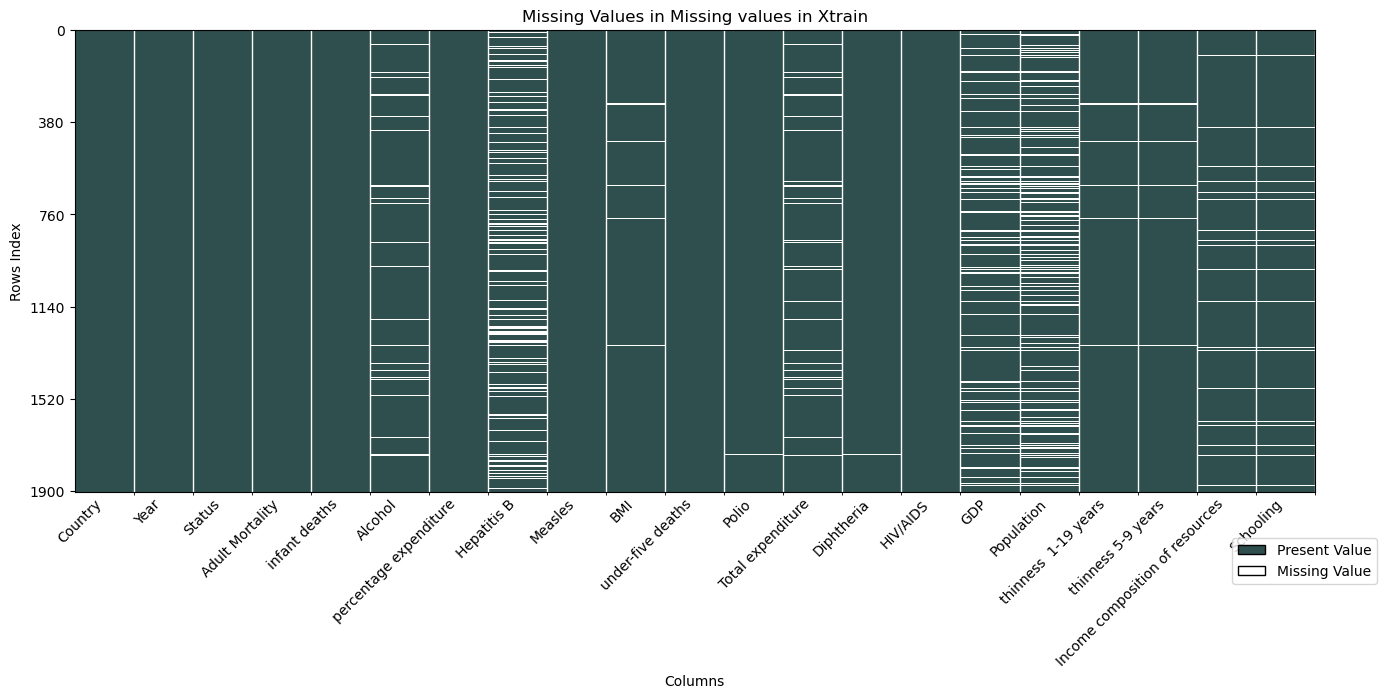

In [8]:
missingValuesGraph(Xtrain, "Missing values in Xtrain")

### Analýza sloupců

#### Country, Status

In [9]:
print(Xtrain['Country'].unique())
Xtrain['Country'].nunique()

['Mauritius' 'United States of America' 'Mauritania'
 'Venezuela (Bolivarian Republic of)' 'India' 'Russian Federation'
 'Kiribati' 'Sierra Leone' 'Chad' 'Thailand' 'Pakistan' 'Papua New Guinea'
 'Croatia' 'Senegal' 'Japan' 'Indonesia' 'Ecuador' 'Afghanistan' 'Brazil'
 'Latvia' 'Guatemala' 'New Zealand'
 'The former Yugoslav republic of Macedonia' 'Yemen' 'Equatorial Guinea'
 'Bahamas' 'Bahrain' 'Uzbekistan' "Democratic People's Republic of Korea"
 'Israel' 'Nicaragua' 'Botswana' 'Liberia' 'Sweden' 'Bulgaria'
 'Azerbaijan' 'Madagascar' 'Djibouti' 'Belgium' 'Saint Lucia' 'Rwanda'
 'Guinea' 'Ethiopia' 'France' 'Australia' 'Malaysia' 'Tunisia' 'Maldives'
 'Cuba' 'Cyprus' 'Benin' "Côte d'Ivoire" 'Uganda' 'Vanuatu' 'Greece'
 'Ukraine' 'Peru' 'United Republic of Tanzania' 'Colombia' 'Qatar'
 'United Kingdom of Great Britain and Northern Ireland' 'Suriname'
 'United Arab Emirates' 'Chile' 'Slovenia' 'Kenya' 'Luxembourg'
 'Dominican Republic' 'Cambodia' 'Iran (Islamic Republic of)'
 'Bolivia (

183

['Developing' 'Developed']
Developing    1590
Developed      312
Name: Status, dtype: int64


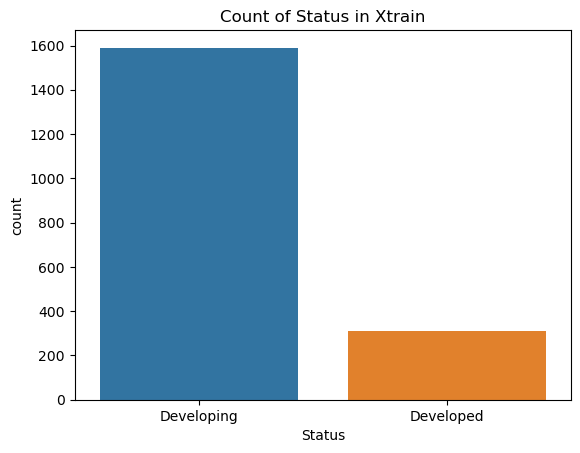

In [10]:
print(Xtrain['Status'].unique())
print(Xtrain['Status'].value_counts())
sns.countplot(x='Status', data=Xtrain)
plt.title('Count of Status in Xtrain')
plt.show()

#### Year

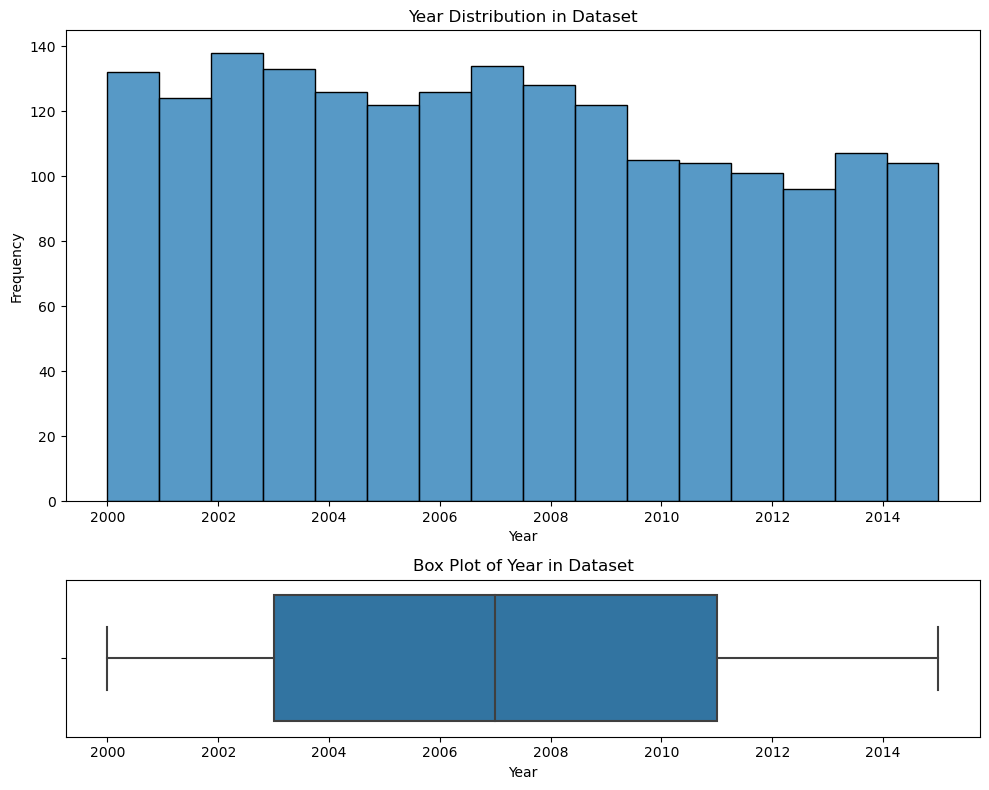

count    1902.000000
mean     2007.066772
std         4.549946
min      2000.000000
25%      2003.000000
50%      2007.000000
75%      2011.000000
max      2015.000000
Name: Year, dtype: float64

In [11]:
hist_box(Xtrain, 'Year', Xtrain['Year'].nunique())

#### Adult mortality, infant deaths, under-five deaths

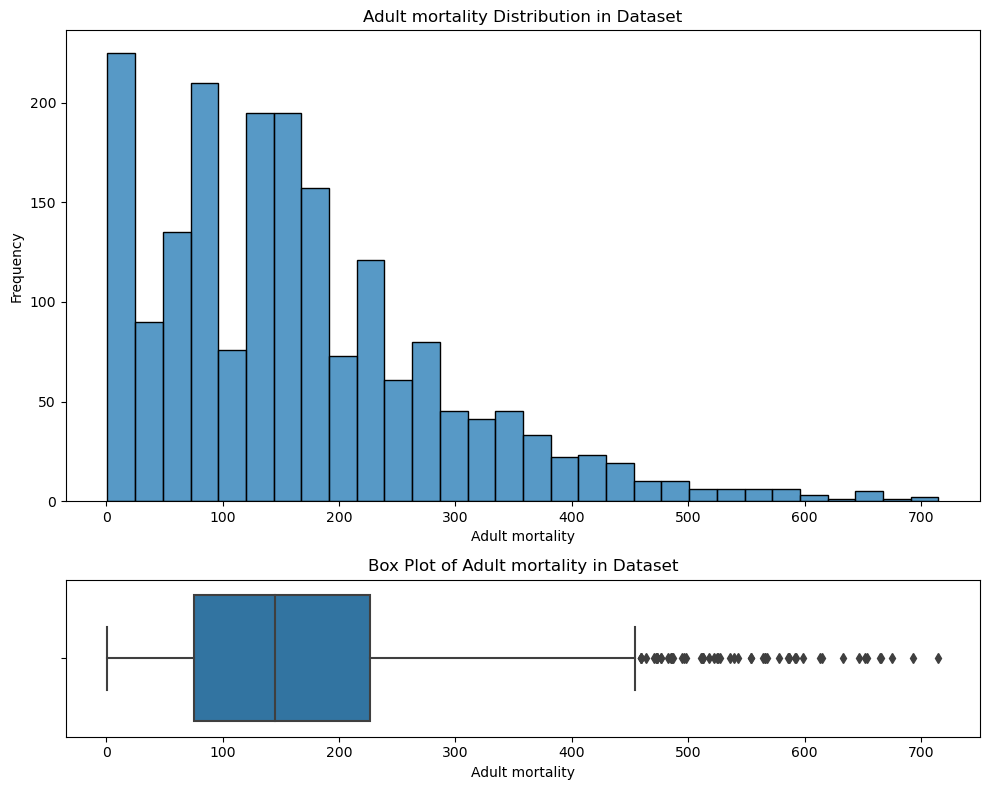

count    1902.000000
mean      165.882229
std       123.607173
min         1.000000
25%        75.000000
50%       145.000000
75%       226.750000
max       715.000000
Name: Adult Mortality, dtype: float64

In [12]:
hist_box(Xtrain, 'Adult Mortality', 'auto')

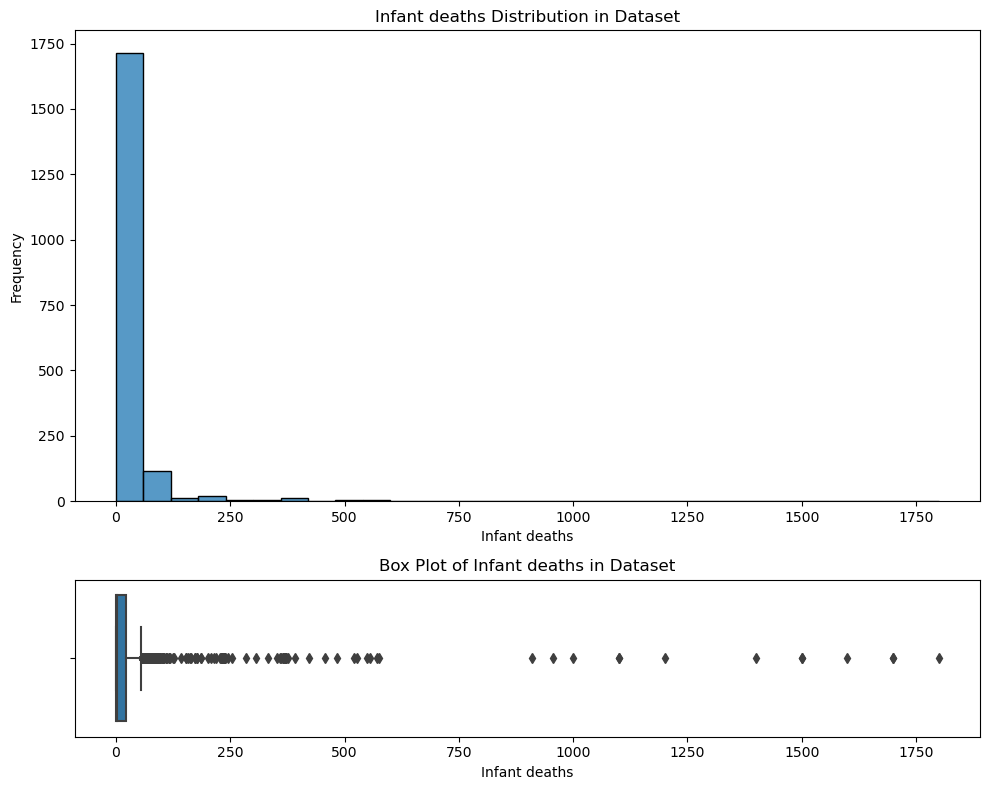

count    1902.000000
mean       31.407466
std       125.573494
min         0.000000
25%         0.000000
50%         3.000000
75%        22.000000
max      1800.000000
Name: infant deaths, dtype: float64

In [13]:
hist_box(Xtrain, 'infant deaths', 30)

Z grafu vidíme, že existují odlehlé hodnoty, které jsou větší než 1000. To je určitě špatně. Zkusím ty záznamy blíže prouzkoumat.

In [14]:
display(Xtrain[Xtrain['infant deaths'] > 750].sort_values(by='Year')[['Country', 'Year', 'infant deaths']])
print(Xtrain[Xtrain['infant deaths'] > 750].sort_values(by='Year')[['Country', 'Year', 'infant deaths']].shape)
display(Xtrain[Xtrain['Country'] == 'India'].sort_values(by='Year'))

,Country,Year,infant deaths
1102,India,2001,1800
1101,India,2002,1700
1100,India,2003,1700
1099,India,2004,1600
1098,India,2005,1500
1097,India,2006,1500
1096,India,2007,1400
1093,India,2010,1200
1092,India,2011,1100
1091,India,2012,1100


(13, 3)


,Country,Year,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
1102,India,2001,Developing,222.0,1800,1.00,19.003406,NaN,51780,11.8,...,58.0,4.50,59.0,0.3,447.138966,1.714779e+08,27.5,28.5,0.494,8.3
1101,India,2002,Developing,219.0,1700,1.10,17.812056,NaN,40044,12.2,...,58.0,4.40,59.0,0.3,466.284200,1.898711e+07,27.4,28.4,0.499,8.4
1100,India,2003,Developing,216.0,1700,1.19,19.480868,NaN,47147,12.6,...,57.0,4.30,61.0,0.3,541.135228,1.182785e+07,27.3,28.3,0.505,8.6
1099,India,2004,Developing,214.0,1600,1.20,27.338009,6.0,55443,13.0,...,58.0,4.22,63.0,0.3,621.318377,1.126136e+09,27.2,28.2,0.518,9.2
1098,India,2005,Developing,211.0,1500,1.27,3.509637,8.0,36711,13.5,...,65.0,4.28,65.0,0.3,77.819000,1.144119e+09,27.2,28.1,0.526,9.4
1097,India,2006,Developing,28.0,1500,1.37,34.859427,6.0,64185,13.9,...,66.0,4.25,65.0,0.3,792.259698,1.161978e+09,27.1,28.0,0.536,9.7
1096,India,2007,Developing,26.0,1400,1.59,5.234770,6.0,41144,14.4,...,67.0,4.23,64.0,0.3,118.166373,1.179681e+09,27.1,28.0,0.546,9.9
1093,India,2010,Developing,196.0,1200,2.77,57.733599,38.0,31458,15.9,...,76.0,4.28,79.0,0.2,1345.771530,1.239869e+07,27.0,27.8,0.569,10.4
1092,India,2011,Developing,193.0,1100,3.00,64.605901,44.0,33634,16.4,...,79.0,4.33,82.0,0.2,1461.671957,1.247236e+08,26.9,27.7,0.580,10.8
1091,India,2012,Developing,19.0,1100,3.10,64.969645,73.0,18668,17.0,...,79.0,4.39,82.0,0.2,1446.985410,1.263659e+08,26.9,27.6,0.590,11.3


Všechny hodnoty pochází z Indie. Vypadá to na systematickou chybu. Hodnoty nejsou dostatečeně vysoké, aby to byly absolutní hodnoty úmrtí. Abych je vrátil do rozsahu, tak je vynásobím: průměr_dataset/hodnota z 2015. (resp. vydělím hodnotou, o kolik je větší hodnota z roku 2015 oproti průměru). Tím jistě vrátím všechny hodnoty do rozsahu 0-1000. Zároveň zachovám klesající trend.

In [15]:
Xtrain.loc[Xtrain['infant deaths'] > 750, 'infant deaths'] /= (910/(Xtrain['infant deaths'].mean()))

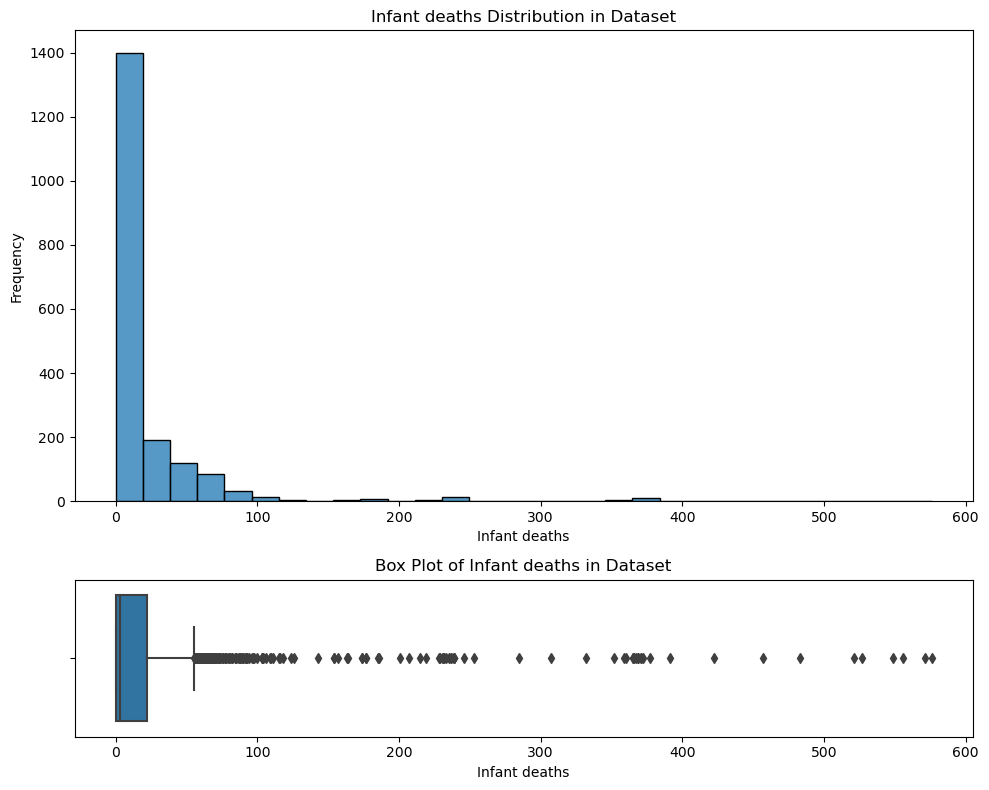

count    1902.000000
mean       22.540931
std        57.437402
min         0.000000
25%         0.000000
50%         3.000000
75%        22.000000
max       576.000000
Name: infant deaths, dtype: float64

In [16]:
hist_box(Xtrain, 'infant deaths', 30) #po uprave

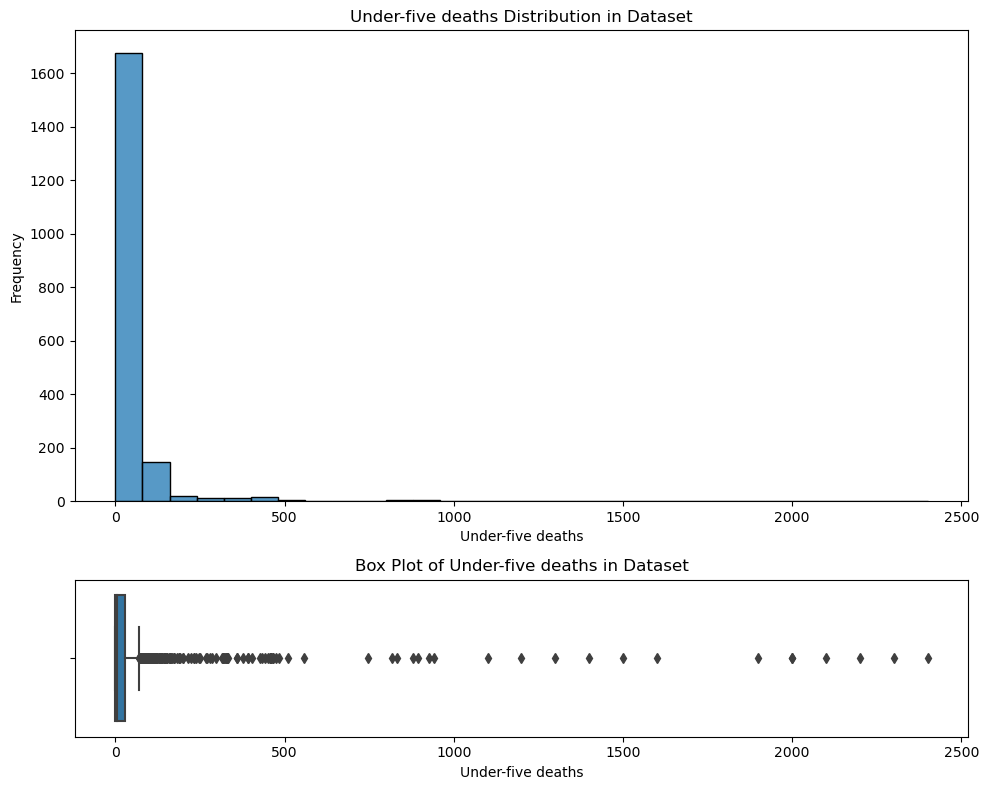

count    1902.000000
mean       43.074658
std       168.293626
min         0.000000
25%         0.000000
50%         4.000000
75%        28.000000
max      2400.000000
Name: under-five deaths, dtype: float64

In [17]:
hist_box(Xtrain, 'under-five deaths', 30)

Podobný problém nastává i ve sloupci under-five deaths. Podívám se na hodnoty větší než 1000.

In [18]:
display(Xtrain[Xtrain['under-five deaths'] > 1000].sort_values(by='Year')[['Country', 'Year', 'under-five deaths']])
print(Xtrain[Xtrain['under-five deaths'] > 1000].sort_values(by='Year')[['Country', 'Year', 'under-five deaths']].shape)
display(Xtrain[Xtrain['Country'] == 'India'].sort_values(by='Year'))

,Country,Year,under-five deaths
1102,India,2001,2400
1101,India,2002,2300
1100,India,2003,2200
1099,India,2004,2100
1098,India,2005,2000
1097,India,2006,2000
1096,India,2007,1900
1093,India,2010,1600
1092,India,2011,1500
1091,India,2012,1400


(13, 3)


,Country,Year,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
1102,India,2001,Developing,222.0,62.124658,1.00,19.003406,NaN,51780,11.8,...,58.0,4.50,59.0,0.3,447.138966,1.714779e+08,27.5,28.5,0.494,8.3
1101,India,2002,Developing,219.0,58.673288,1.10,17.812056,NaN,40044,12.2,...,58.0,4.40,59.0,0.3,466.284200,1.898711e+07,27.4,28.4,0.499,8.4
1100,India,2003,Developing,216.0,58.673288,1.19,19.480868,NaN,47147,12.6,...,57.0,4.30,61.0,0.3,541.135228,1.182785e+07,27.3,28.3,0.505,8.6
1099,India,2004,Developing,214.0,55.221918,1.20,27.338009,6.0,55443,13.0,...,58.0,4.22,63.0,0.3,621.318377,1.126136e+09,27.2,28.2,0.518,9.2
1098,India,2005,Developing,211.0,51.770548,1.27,3.509637,8.0,36711,13.5,...,65.0,4.28,65.0,0.3,77.819000,1.144119e+09,27.2,28.1,0.526,9.4
1097,India,2006,Developing,28.0,51.770548,1.37,34.859427,6.0,64185,13.9,...,66.0,4.25,65.0,0.3,792.259698,1.161978e+09,27.1,28.0,0.536,9.7
1096,India,2007,Developing,26.0,48.319178,1.59,5.234770,6.0,41144,14.4,...,67.0,4.23,64.0,0.3,118.166373,1.179681e+09,27.1,28.0,0.546,9.9
1093,India,2010,Developing,196.0,41.416438,2.77,57.733599,38.0,31458,15.9,...,76.0,4.28,79.0,0.2,1345.771530,1.239869e+07,27.0,27.8,0.569,10.4
1092,India,2011,Developing,193.0,37.965069,3.00,64.605901,44.0,33634,16.4,...,79.0,4.33,82.0,0.2,1461.671957,1.247236e+08,26.9,27.7,0.580,10.8
1091,India,2012,Developing,19.0,37.965069,3.10,64.969645,73.0,18668,17.0,...,79.0,4.39,82.0,0.2,1446.985410,1.263659e+08,26.9,27.6,0.590,11.3


Stejné řádky jako v minulém případě. Vyřeším obdobně. 

nova_hodnota = hodnota / (Nejnověší záznam / průměr sloupce).

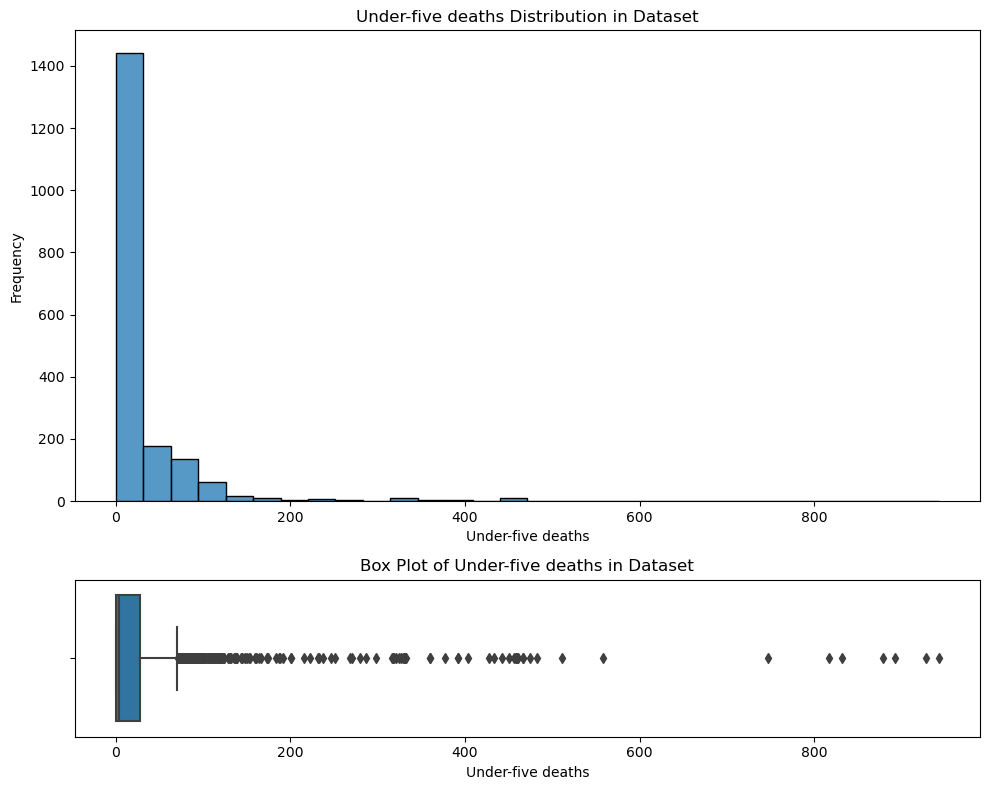

count    1902.000000
mean       31.455653
std        81.201446
min         0.000000
25%         0.000000
50%         4.000000
75%        28.000000
max       943.000000
Name: under-five deaths, dtype: float64

In [19]:
Xtrain.loc[Xtrain['under-five deaths'] > 1000, 'under-five deaths'] /= (1100/(Xtrain['under-five deaths'].mean()))
hist_box(Xtrain, 'under-five deaths', 30) #po uprave

#### Hepatitis B, Measles, Polio, HIV/AIDS, Diphtheria

##### Hepatitis B

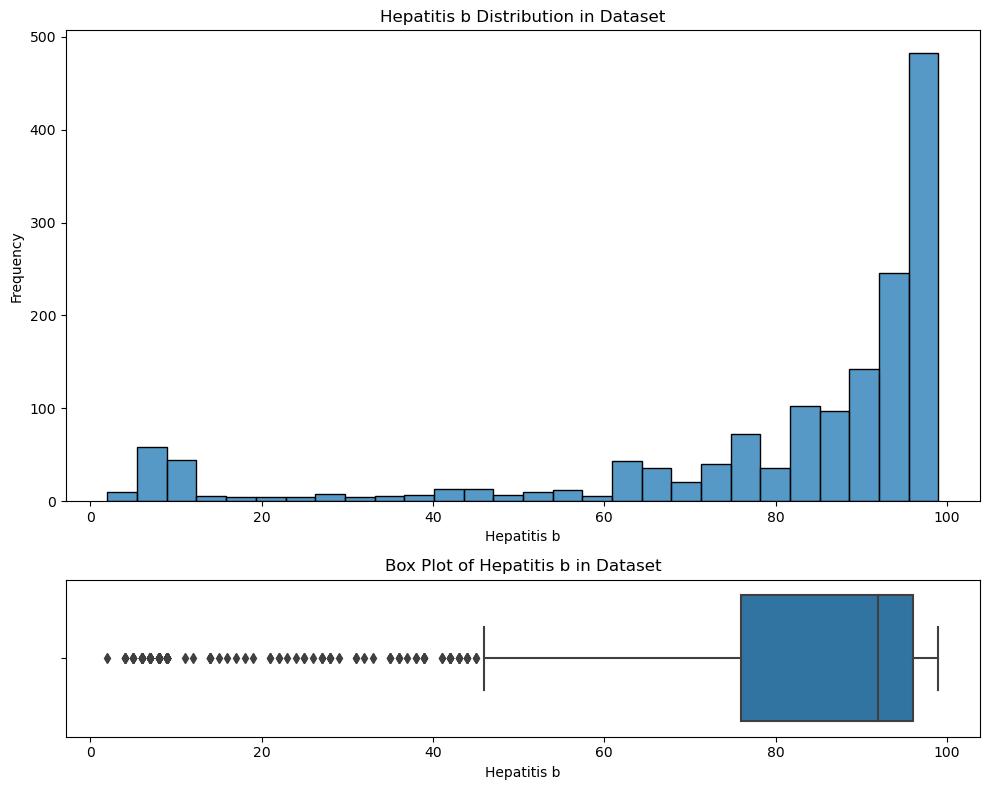

count    1536.000000
mean       80.227214
std        25.765842
min         2.000000
25%        76.000000
50%        92.000000
75%        96.000000
max        99.000000
Name: Hepatitis B, dtype: float64

In [20]:
hist_box(Xtrain, 'Hepatitis B', 'auto')

Rozsahy hodnot vypadají v pořádku. Nicméně existují chybějící hodnoty.

Country  Year  Hepatitis B
Country                                                       
Algeria             35              Algeria  2000          NaN
                    33              Algeria  2002          NaN
                    32              Algeria  2003          NaN
                    31              Algeria  2004         81.0
                    30              Algeria  2005         83.0
                    28              Algeria  2007          9.0
                    27              Algeria  2008         91.0
Angola              50               Angola  2001          NaN
                    47               Angola  2004          NaN
                    46               Angola  2005          NaN
                    45               Angola  2006          NaN
                    44               Angola  2007         73.0
                    41               Angola  2010         77.0
                    39               Angola  2012         75.0
                    37               Angola  2014         64.0
                    36               Angola  2015         64.0
Antigua and Barbuda 67  Antigua and Barbuda  2000          NaN
                    65  Antigua and Barbuda  2002         99.0
                    61  Antigua and Barbuda  2006         99.0
                    60  Antigua and Barbuda  2007         97.0

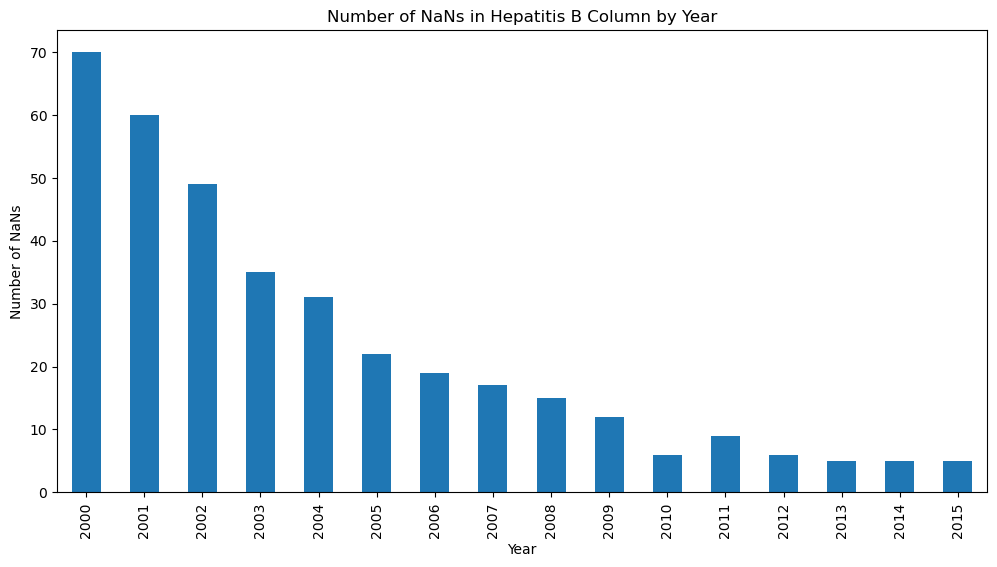

In [21]:
hepa_miss = set(Xtrain[Xtrain['Hepatitis B'].isna()]['Country'].unique())
display(Xtrain[(Xtrain['Country'].isin(hepa_miss))].
        groupby('Country').
        apply(lambda x: x.sort_values(by='Year'))
        [['Country', 'Year', 'Hepatitis B']].head(20))

nan_counts = Xtrain.groupby('Year')['Hepatitis B'].apply(lambda x: x.isna().sum())
nan_counts.plot(kind='bar', figsize=(12, 6))
plt.title('Number of NaNs in Hepatitis B Column by Year')
plt.xlabel('Year')
plt.ylabel('Number of NaNs')
plt.show()

Chybějící data nahradím nejstarší známou hodnotou pročkovanosti, pokud existuje. Pokud neexistuje nahradím průměrem. Důvody pro to jsou 2: proočkovanost s časem roste a z předchozí vizualizace distribuci chybějících hodnot, které se vyskytují hlavně ve starších záznamech, tedy pravděpodobně se v té době ještě tato metrika nesledovala. Pak existují státy, které neměřili Hepaptitidu B ani jednou. Ty doplním průměrem.

In [ ]:
def context_specific_imputation(df, col, group_col, year_col):
    mean_of_column = df[col].mean() 
    for group, group_data in df.groupby(group_col):
        if group_data[col].isna().all():
            df.loc[group_data.index, col] = mean_of_column
        else:
            oldest_value = group_data.loc[group_data.loc[group_data[col].notna(), year_col].idxmin()][col]
            df.loc[group_data.index, col] = group_data[col].fillna(oldest_value)
    return df

# Apply the imputation strategy
data_imputed = context_specific_imputation(Xtrain, 'Hepatitis B', 'Country', 'Year')
Xtrain = data_imputed
Xtrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1902 entries, 1526 to 2267
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          1902 non-null   object 
 1   Year                             1902 non-null   int64  
 2   Status                           1902 non-null   object 
 3   Adult Mortality                  1902 non-null   float64
 4   infant deaths                    1902 non-null   float64
 5   Alcohol                          1788 non-null   float64
 6   percentage expenditure           1902 non-null   float64
 7   Hepatitis B                      1902 non-null   float64
 8   Measles                          1902 non-null   int64  
 9   BMI                              1878 non-null   float64
 10  under-five deaths                1902 non-null   float64
 11  Polio                            1889 non-null   float64
 12  Total expenditure

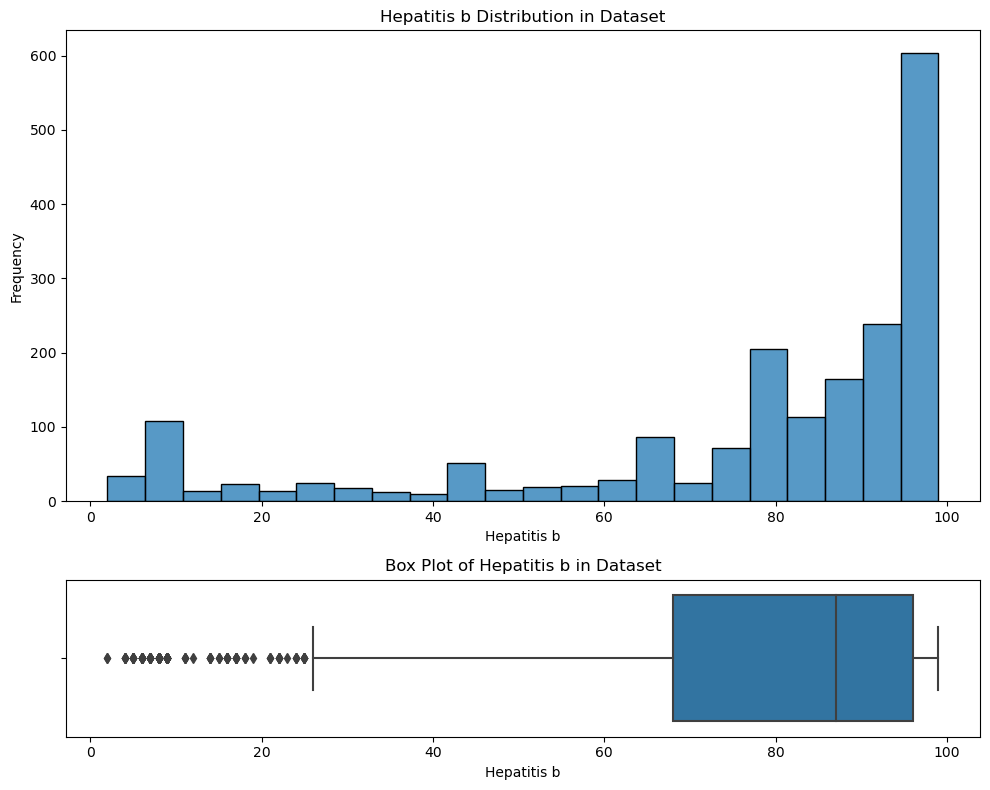

count    1902.000000
mean       76.114326
std        27.570239
min         2.000000
25%        68.000000
50%        87.000000
75%        96.000000
max        99.000000
Name: Hepatitis B, dtype: float64

In [23]:
hist_box(Xtrain, 'Hepatitis B', 'auto') #after imputation

##### Measles

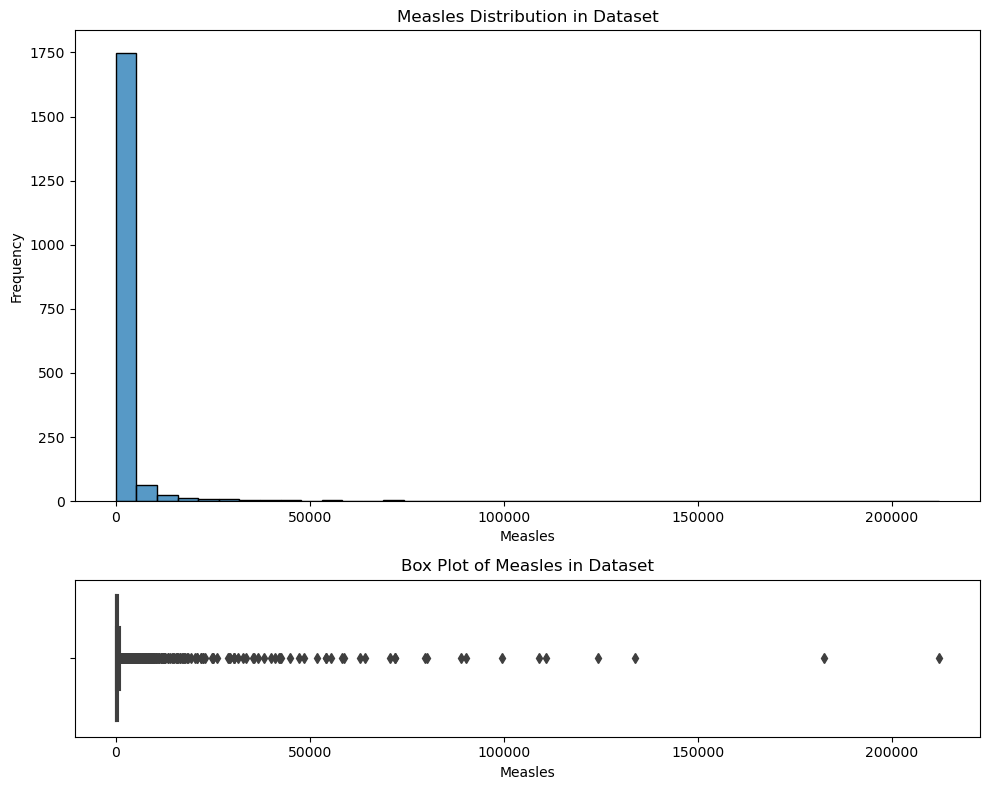

count      1902.000000
mean       2435.195584
std       11541.730289
min           0.000000
25%           0.000000
50%          17.000000
75%         409.500000
max      212183.000000
Name: Measles, dtype: float64

In [24]:
hist_box(Xtrain, 'Measles', 40)

In [25]:
display(Xtrain[Xtrain['Measles'] > 1000].groupby('Country').apply(lambda x: x.sort_values(by='Measles', ascending=False))[['Country', 'Year', 'Measles', 'Population']].head(40))

Country  Year  Measles   Population
Country                                                   
Afghanistan  14    Afghanistan  2001     8762    2966463.0
             6     Afghanistan  2009     2861     284331.0
             3     Afghanistan  2012     2787    3696958.0
             13    Afghanistan  2002     2486   21979923.0
             9     Afghanistan  2006     1990    2589345.0
             5     Afghanistan  2010     1989    2883167.0
             10    Afghanistan  2005     1296     257798.0
             0     Afghanistan  2015     1154   33736494.0
             8     Afghanistan  2007     1141   26616792.0
Algeria      32        Algeria  2003    15374    3243514.0
             33        Algeria  2002     5862    3199546.0
             31        Algeria  2004     3289    3283196.0
             30        Algeria  2005     2302   33288437.0
Angola       37         Angola  2014    11699    2692466.0
             50         Angola  2001     9046   16983266.0
             39         Angola  2012     4458     259615.0
             41         Angola  2010     1190   23369131.0
             44         Angola  2007     1014    2997687.0
Armenia      94        Armenia  2005     2281    2981259.0
             95        Armenia  2004     1783       3612.0
Azerbaijan   144    Azerbaijan  2003     1978      82341.0
Bangladesh   184    Bangladesh  2005    25934   14343111.0
             185    Bangladesh  2004     9743   14137489.0
             183    Bangladesh  2006     6192    1453684.0
             178    Bangladesh  2011     5625  153911916.0
             189    Bangladesh  2000     5098  131581243.0
             188    Bangladesh  2001     4414    1341716.0
             187    Bangladesh  2002     3484    1366667.0
             182    Bangladesh  2007     2924  147139191.0
             177    Bangladesh  2012     1986   15572753.0
Benin        268         Benin  2001     5859     776733.0
             269         Benin  2000     4244    6865951.0
             267         Benin  2002     1588    7295394.0
Botswana     321      Botswana  2000     2672     172834.0
Bulgaria     359      Bulgaria  2010    22004    7395599.0
             360      Bulgaria  2009     2249    7444443.0
Burkina Faso 376  Burkina Faso  2009    54118    1514199.0
             385  Burkina Faso  2000     6074    1167942.0
             384  Burkina Faso  2001     4174   11944587.0
             382  Burkina Faso  2003     2946   12654621.0

V datech je hodně silných outlierů nad 1000. Pravděpodobně jsou to absolutní hodnoty výskytů. Z důvodu nekvalitnosti sloupce Population (hodně chybějících hodnot, nekonzistentnost) nahradím outliery mediánem.

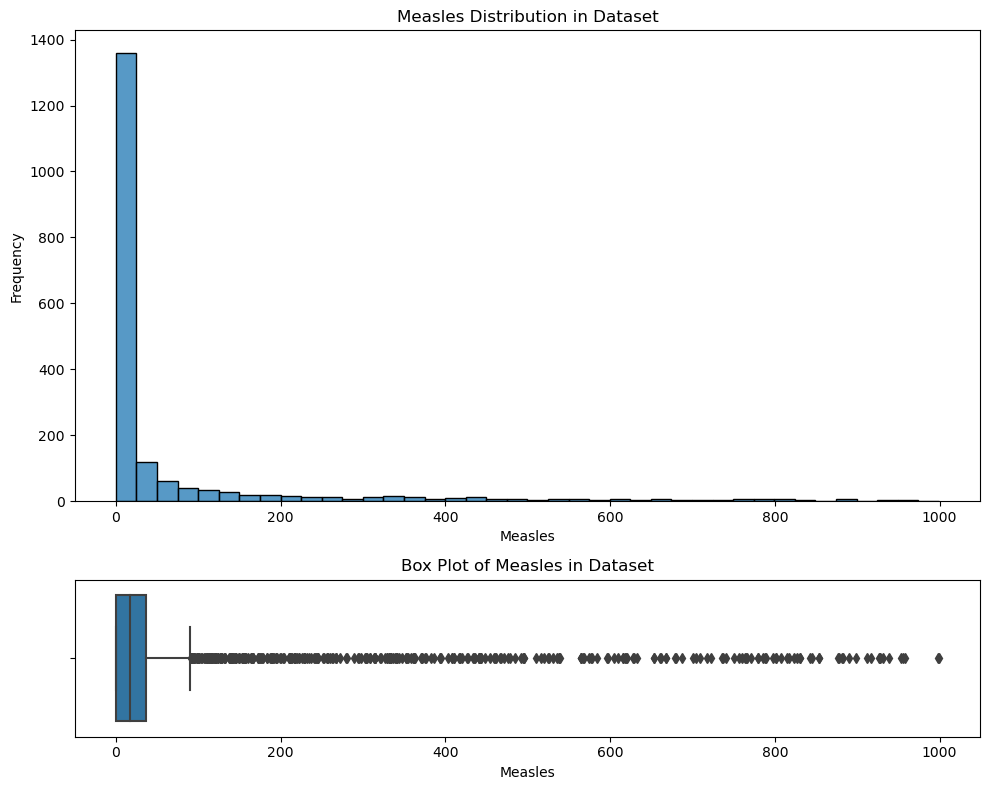

count    1902.000000
mean       76.442166
std       174.434337
min         0.000000
25%         0.000000
50%        17.000000
75%        36.000000
max       999.000000
Name: Measles, dtype: float64

In [26]:
measles_median = Xtrain['Measles'].median()
Xtrain.loc[Xtrain['Measles'] > 1000, 'Measles'] = measles_median
hist_box(Xtrain, 'Measles', 40)

##### Polio

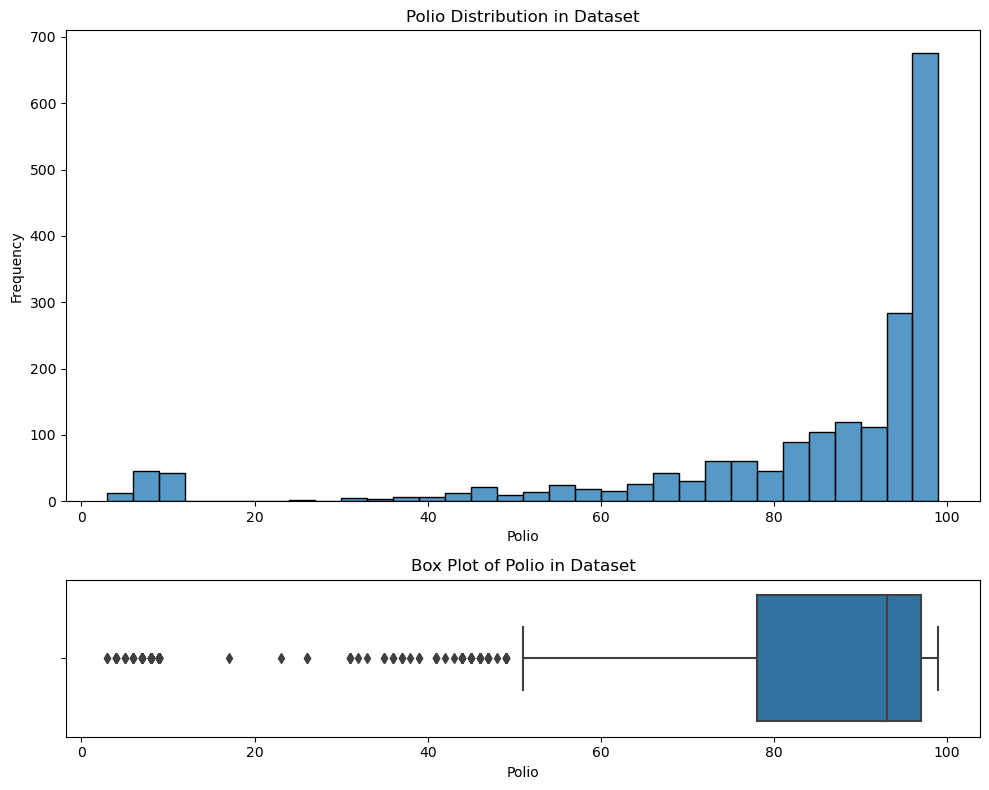

count    1889.000000
mean       82.910005
std        22.647266
min         3.000000
25%        78.000000
50%        93.000000
75%        97.000000
max        99.000000
Name: Polio, dtype: float64

In [27]:
hist_box(Xtrain, 'Polio', 'auto')

In [28]:
pol_miss = set(Xtrain[Xtrain['Polio'].isna()]['Country'].unique())
display(Xtrain[(Xtrain['Country'].isin(pol_miss))].
        groupby('Country').
        apply(lambda x: x.sort_values(by='Year'))
        [['Country', 'Year', 'Polio']].head(40))

Country  Year  Polio
Country                                   
Montenegro  1605   Montenegro  2000    NaN
            1603   Montenegro  2002    NaN
            1601   Montenegro  2004    NaN
            1600   Montenegro  2005    NaN
            1599   Montenegro  2006    9.0
            1598   Montenegro  2007   92.0
            1597   Montenegro  2008   95.0
            1596   Montenegro  2009   91.0
            1595   Montenegro  2010   93.0
            1593   Montenegro  2012   94.0
            1592   Montenegro  2013   94.0
            1590   Montenegro  2015   89.0
South Sudan 2228  South Sudan  2001    NaN
            2224  South Sudan  2005    NaN
            2223  South Sudan  2006    NaN
            2222  South Sudan  2007    NaN
            2221  South Sudan  2008    NaN
            2220  South Sudan  2009    NaN
            2219  South Sudan  2010    NaN
            2218  South Sudan  2011   66.0
            2217  South Sudan  2012   64.0
            2216  South Sudan  2013    5.0
            2215  South Sudan  2014   44.0
            2214  South Sudan  2015   41.0
Timor-Leste 2409  Timor-Leste  2000    NaN
            2408  Timor-Leste  2001    NaN
            2405  Timor-Leste  2004   57.0
            2404  Timor-Leste  2005   55.0
            2403  Timor-Leste  2006   62.0
            2402  Timor-Leste  2007    7.0
            2401  Timor-Leste  2008   79.0
            2400  Timor-Leste  2009   78.0
            2399  Timor-Leste  2010   72.0
            2397  Timor-Leste  2012   83.0
            2395  Timor-Leste  2014   76.0

Chybějících hodnot není mnoho, proto nahradím průměrem z ostatních hodnot pročkovanosti daného státu.

In [29]:
Xtrain['Polio'] = Xtrain.groupby('Country')['Polio'].transform(lambda x: x.fillna(x.mean()))

##### Diphtheria

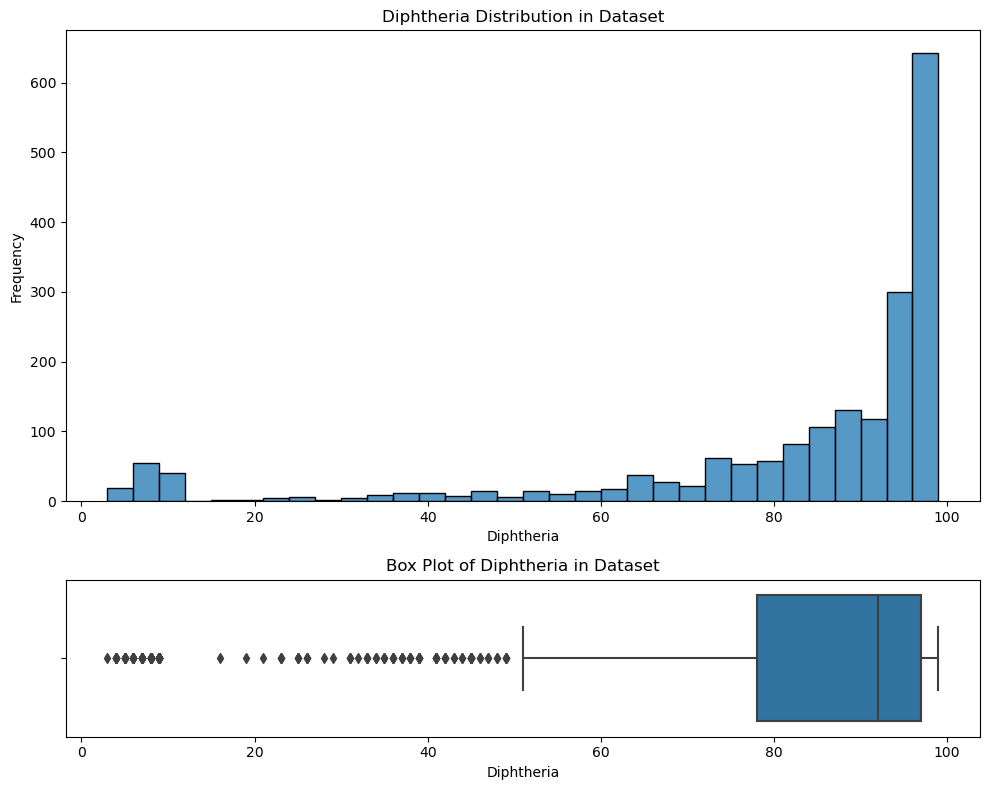

count    1889.000000
mean       82.142933
std        23.905661
min         3.000000
25%        78.000000
50%        92.000000
75%        97.000000
max        99.000000
Name: Diphtheria, dtype: float64

In [30]:
hist_box(Xtrain, 'Diphtheria', 'auto')

In [31]:
dip_miss = set(Xtrain[Xtrain['Diphtheria'].isna()]['Country'].unique())
display(Xtrain[(Xtrain['Country'].isin(dip_miss))].
        groupby('Country').
        apply(lambda x: x.sort_values(by='Year'))
        [['Country', 'Year', 'Diphtheria']].head(40))

Country  Year  Diphtheria
Country                                        
Montenegro  1605   Montenegro  2000         NaN
            1603   Montenegro  2002         NaN
            1601   Montenegro  2004         NaN
            1600   Montenegro  2005         NaN
            1599   Montenegro  2006         9.0
            1598   Montenegro  2007        92.0
            1597   Montenegro  2008        95.0
            1596   Montenegro  2009        92.0
            1595   Montenegro  2010        94.0
            1593   Montenegro  2012        94.0
            1592   Montenegro  2013        94.0
            1590   Montenegro  2015        89.0
South Sudan 2228  South Sudan  2001         NaN
            2224  South Sudan  2005         NaN
            2223  South Sudan  2006         NaN
            2222  South Sudan  2007         NaN
            2221  South Sudan  2008         NaN
            2220  South Sudan  2009         NaN
            2219  South Sudan  2010         NaN
            2218  South Sudan  2011        61.0
            2217  South Sudan  2012        59.0
            2216  South Sudan  2013        45.0
            2215  South Sudan  2014        39.0
            2214  South Sudan  2015        31.0
Timor-Leste 2409  Timor-Leste  2000         NaN
            2408  Timor-Leste  2001         NaN
            2405  Timor-Leste  2004        57.0
            2404  Timor-Leste  2005        55.0
            2403  Timor-Leste  2006        63.0
            2402  Timor-Leste  2007         7.0
            2401  Timor-Leste  2008        79.0
            2400  Timor-Leste  2009        72.0
            2399  Timor-Leste  2010        72.0
            2397  Timor-Leste  2012        83.0
            2395  Timor-Leste  2014        77.0

Stejné státy jako v předchozím příznaku, vyřeším shodně.

In [32]:
Xtrain['Diphtheria'] = Xtrain.groupby('Country')['Diphtheria'].transform(lambda x: x.fillna(x.mean()))

##### HIV/AIDS

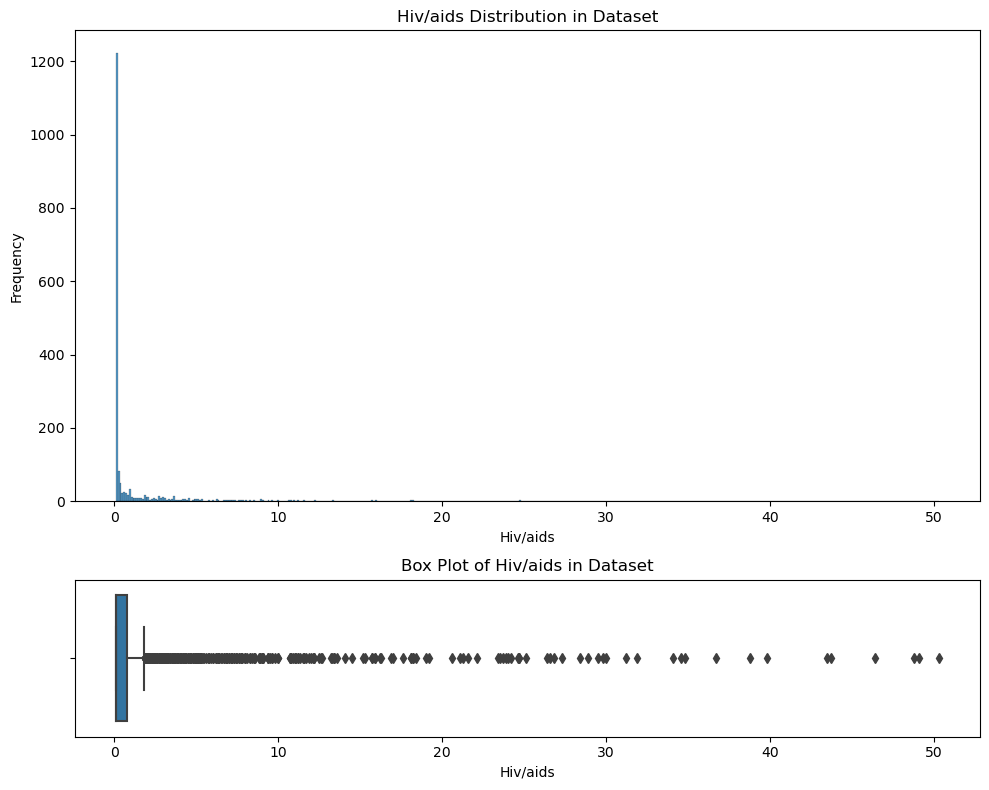

count    1902.000000
mean        1.798686
std         5.084390
min         0.100000
25%         0.100000
50%         0.100000
75%         0.800000
max        50.300000
Name: HIV/AIDS, dtype: float64

In [33]:
hist_box(Xtrain, 'HIV/AIDS', 'auto')

Vypadá v pořádku, neupravuji.

#### Alcohol, BMI, thinness 1-19 years, thinness 5-9 years

##### Alcohol

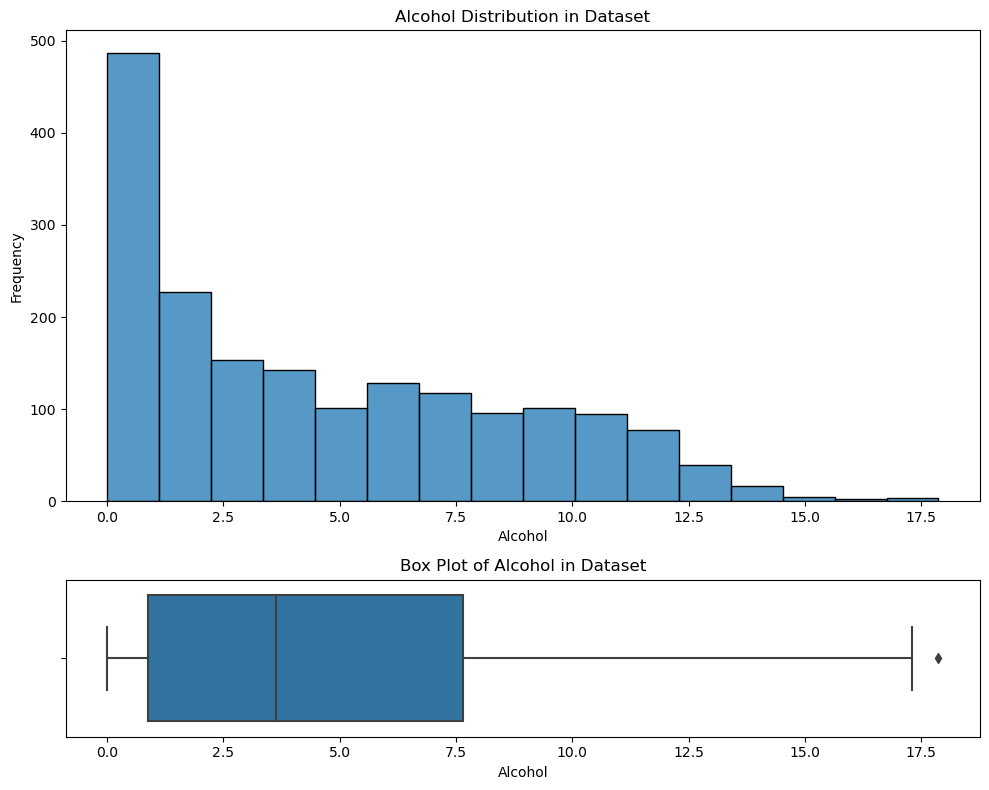

count    1788.000000
mean        4.583881
std         4.049043
min         0.010000
25%         0.877500
50%         3.635000
75%         7.655000
max        17.870000
Name: Alcohol, dtype: float64

In [34]:
hist_box(Xtrain, 'Alcohol', 'auto')

Country  Year  Alcohol
Country                                
Angola    50      Angola  2001     2.58
          47      Angola  2004     3.53
          46      Angola  2005     5.04
          45      Angola  2006     5.84
          44      Angola  2007     6.35
          41      Angola  2010     7.80
          39      Angola  2012     8.24
          37      Angola  2014     8.33
          36      Angola  2015      NaN
Argentina 83   Argentina  2000     7.68
          82   Argentina  2001     7.76
          81   Argentina  2002     7.81
          78   Argentina  2005     7.53
          77   Argentina  2006     7.75
          76   Argentina  2007     8.16
          75   Argentina  2008     8.41
          74   Argentina  2009     8.33
          73   Argentina  2010     8.15
          72   Argentina  2011     8.11
          71   Argentina  2012     8.35
          69   Argentina  2014     7.93
          68   Argentina  2015      NaN
Australia 115  Australia  2000    10.17
          114  Australia  2001     9.53
          113  Australia  2002     9.84
          112  Australia  2003     9.97
          111  Australia  2004     9.84
          109  Australia  2006    10.31
          108  Australia  2007    10.56
          107  Australia  2008    10.76
          106  Australia  2009    10.62
          105  Australia  2010    10.52
          104  Australia  2011    10.30
          103  Australia  2012    10.03
          102  Australia  2013     9.87
          101  Australia  2014     9.71
          100  Australia  2015      NaN
Austria   131    Austria  2000    13.20
          130    Austria  2001    12.40
          129    Austria  2002    12.50

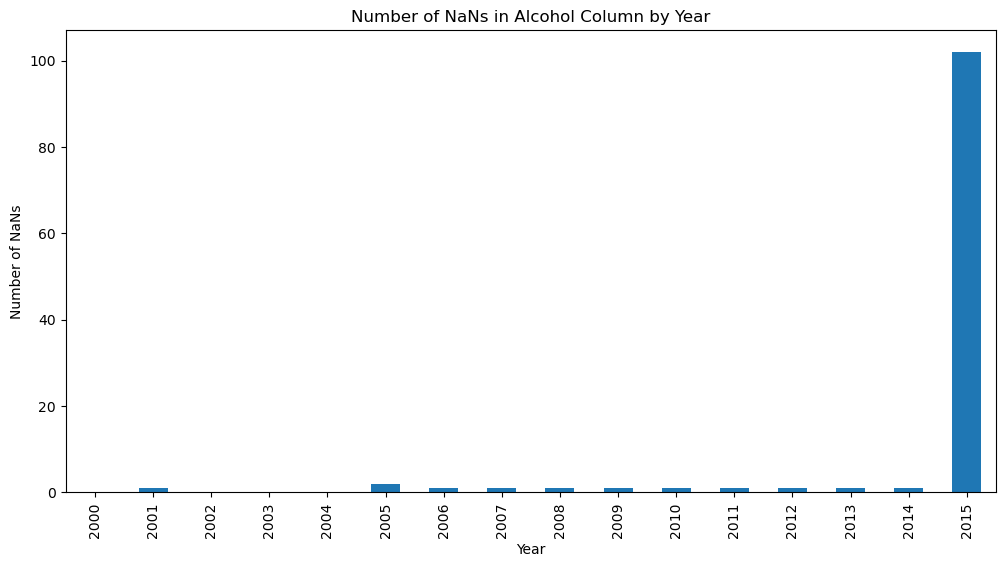

In [42]:
alc_miss = set(Xtrain[Xtrain['Alcohol'].isna()]['Country'].unique())
display(Xtrain[(Xtrain['Country'].isin(alc_miss))].
        groupby('Country').
        apply(lambda x: x.sort_values(by='Year'))
        [['Country', 'Year', 'Alcohol']].head(40))

nan_counts = Xtrain.groupby('Year')['Alcohol'].apply(lambda x: x.isna().sum())
nan_counts.plot(kind='bar', figsize=(12, 6))
plt.title('Number of NaNs in Alcohol Column by Year')
plt.xlabel('Year')
plt.ylabel('Number of NaNs')
plt.show()

Vidíme, že chybí hlavně poslední záznamy. Problém vyřeším jako v případu hepatitidy, nahradím hodnotami, které jsou z posledního naměřeného roku, pokud existují. Předpokladám, že spotřeba alcoholu se během roku nezměnila.

In [43]:
def imputation_by_last(df, col, group_col, year_col):
    mean_of_column = df[col].mean() 
    for group, group_data in df.groupby(group_col):
        if group_data[col].isna().all():
            df.loc[group_data.index, col] = mean_of_column
        else:
            newest_value = group_data.loc[group_data.loc[group_data[col].notna(), year_col].idxmax()][col]
            df.loc[group_data.index, col] = group_data[col].fillna(newest_value)
    return df

# Apply the imputation strategy
data_imputed = imputation_by_last(Xtrain, 'Alcohol', 'Country', 'Year')
Xtrain = data_imputed

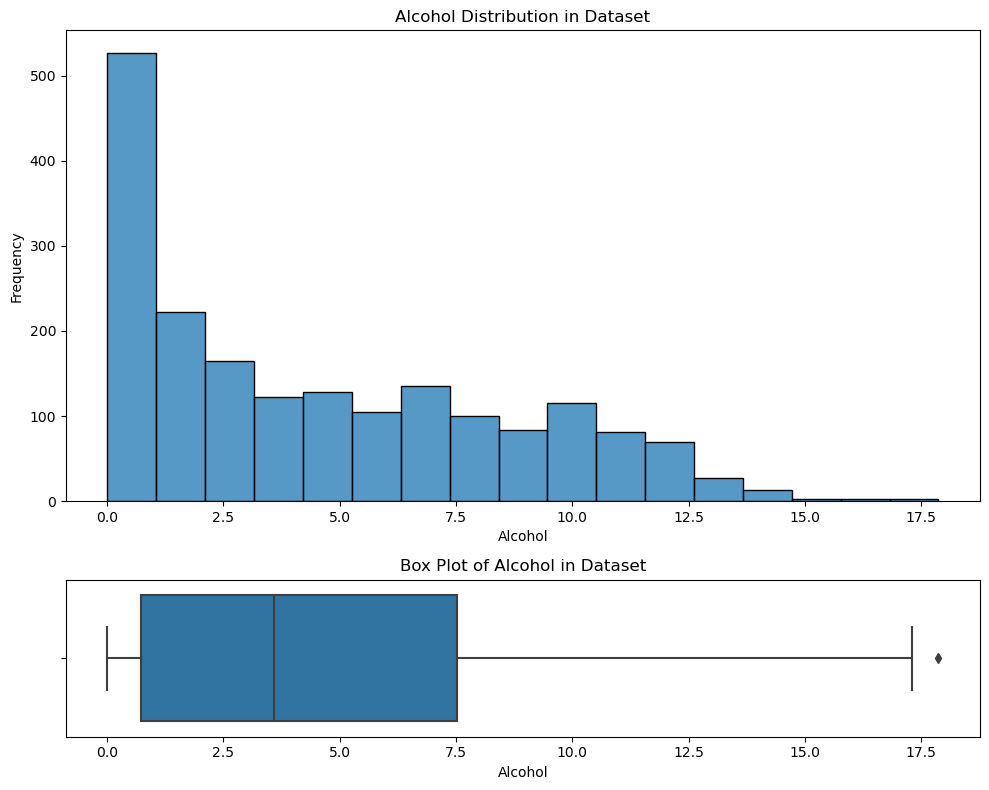

count    1902.000000
mean        4.518631
std         4.045319
min         0.010000
25%         0.730000
50%         3.580000
75%         7.530000
max        17.870000
Name: Alcohol, dtype: float64

In [44]:
hist_box(Xtrain, 'Alcohol', 'auto')

##### BMI

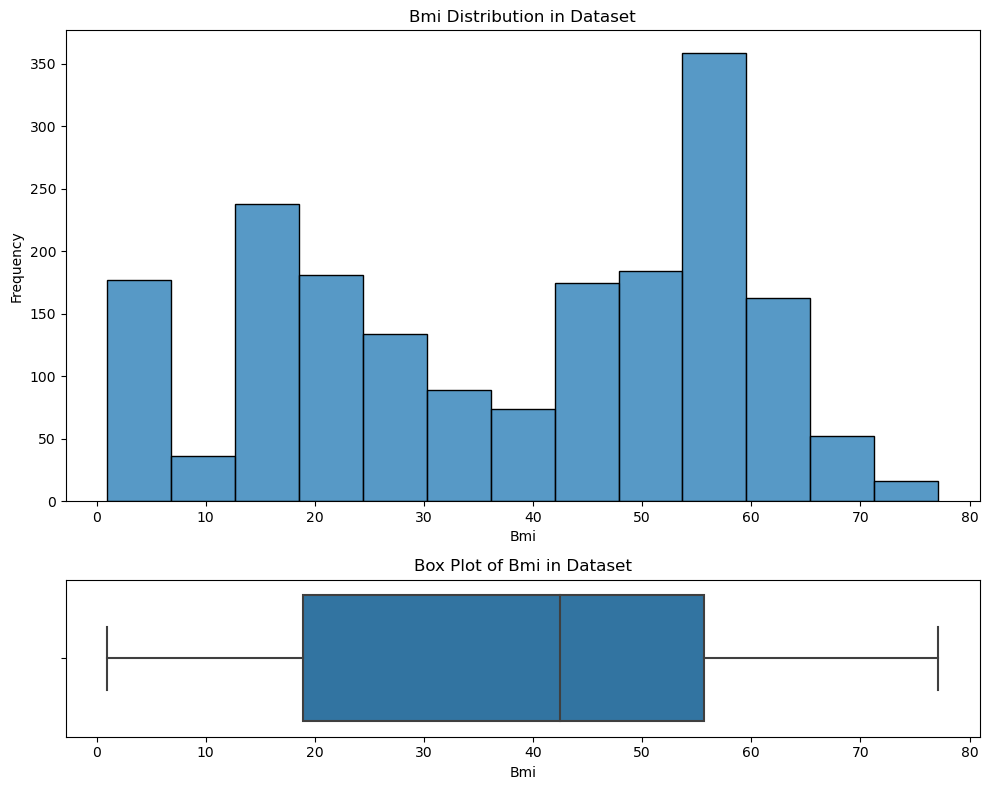

count    1878.000000
mean       37.653994
std        19.924373
min         1.000000
25%        18.900000
50%        42.500000
75%        55.700000
max        77.100000
Name: BMI, dtype: float64

In [48]:
hist_box(Xtrain, 'BMI', 'auto')

#### Population, GDP, Total expenditure, percentage expenditure, Income composition of resources

##### Population

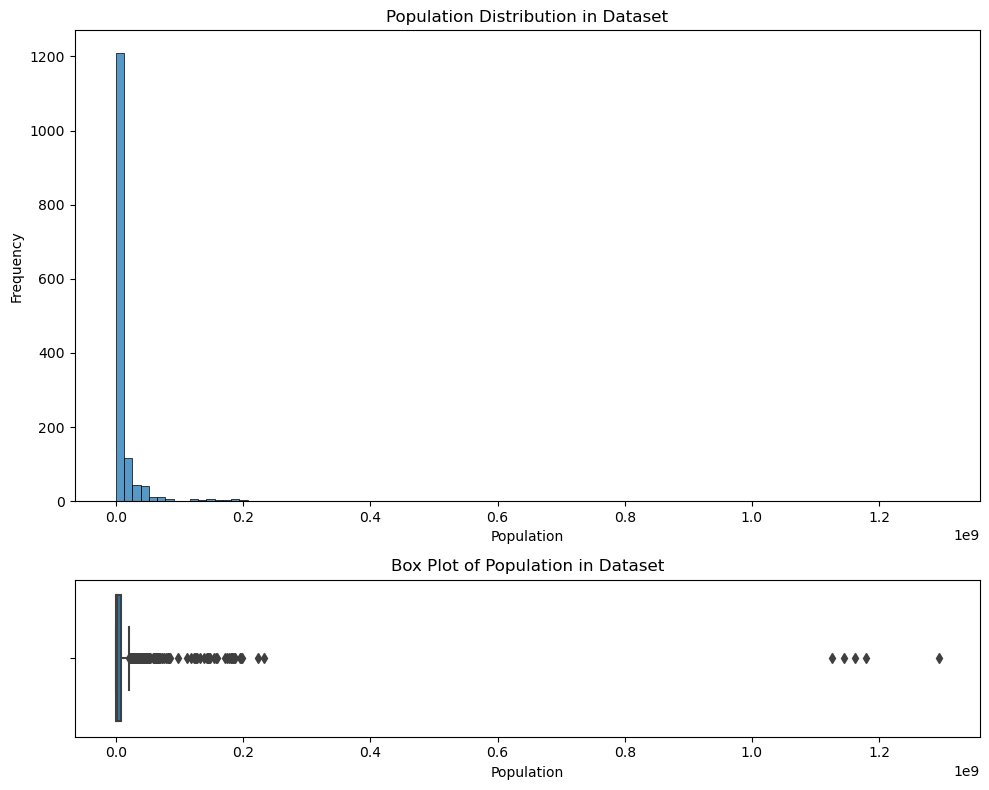

count    1.478000e+03
mean     1.431221e+07
std      7.298245e+07
min      3.400000e+01
25%      2.031178e+05
50%      1.456252e+06
75%      8.185910e+06
max      1.293859e+09
Name: Population, dtype: float64

1526    1.262650e+05
2594             NaN
1523    2.873228e+06
2647             NaN
1099    1.126136e+09
1966    1.446483e+08
1269    1.145800e+04
2113    5.439695e+06
503     1.188722e+06
2367    6.728880e+05
Name: Population, dtype: float64

In [36]:
hist_box(Xtrain,'Population', 100)
Xtrain['Population'].head(10)

In [37]:
pop_miss = set(Xtrain[Xtrain['Population'].isna()]['Country'].unique())
display(Xtrain[Xtrain['Country'].isin(pop_miss)].
        groupby('Country').
        apply(lambda x: x.sort_values(by='Year'))
        [['Country', 'Year', 'Population']].head(40))
display(Xtrain[Xtrain['Country'].isin(pop_miss)].
        groupby('Country').
        apply(lambda x: x.sort_values(by='Year'))
        [['Country', 'Year', 'Population']].tail(50))
Xtrain[Xtrain['Country'] == 'United States of America']

Country  Year  \
Country                                                                        
Antigua and Barbuda              67                Antigua and Barbuda  2000   
                                 65                Antigua and Barbuda  2002   
                                 61                Antigua and Barbuda  2006   
                                 60                Antigua and Barbuda  2007   
                                 59                Antigua and Barbuda  2008   
                                 57                Antigua and Barbuda  2010   
                                 56                Antigua and Barbuda  2011   
                                 54                Antigua and Barbuda  2013   
                                 53                Antigua and Barbuda  2014   
Bahamas                          157                           Bahamas  2000   
                                 156                           Bahamas  2001   
                                 155                           Bahamas  2002   
                                 154                           Bahamas  2003   
                                 153                           Bahamas  2004   
                                 152                           Bahamas  2005   
                                 149                           Bahamas  2008   
                                 148                           Bahamas  2009   
Bahrain                          173                           Bahrain  2000   
                                 169                           Bahrain  2004   
                                 167                           Bahrain  2006   
                                 166                           Bahrain  2007   
                                 165                           Bahrain  2008   
                                 164                           Bahrain  2009   
                                 163                           Bahrain  2010   
                                 161                           Bahrain  2012   
                                 159                           Bahrain  2014   
Barbados                         205                          Barbados  2000   
                                 202                          Barbados  2003   
                                 200                          Barbados  2005   
                                 199                          Barbados  2006   
                                 197                          Barbados  2008   
                                 196                          Barbados  2009   
                                 195                          Barbados  2010   
                                 194                          Barbados  2011   
Bolivia (Plurinational State of) 295  Bolivia (Plurinational State of)  2000   
                                 293  Bolivia (Plurinational State of)  2002   
                                 292  Bolivia (Plurinational State of)  2003   
                                 291  Bolivia (Plurinational State of)  2004   
                                 290  Bolivia (Plurinational State of)  2005   
                                 289  Bolivia (Plurinational State of)  2006   

                                      Population  
Country                                           
Antigua and Barbuda              67          NaN  
                                 65          NaN  
                                 61          NaN  
                                 60          NaN  
                                 59          NaN  
                                 57          NaN  
                                 56          NaN  
                                 54          NaN  
                                 53          NaN  
Bahamas                          157         NaN  
                                 156         NaN  
                                 155   

Country  \
Country                                                                       
United Republic of Tanzania        2577         United Republic of Tanzania   
                                   2576         United Republic of Tanzania   
                                   2575         United Republic of Tanzania   
                                   2574         United Republic of Tanzania   
                                   2570         United Republic of Tanzania   
United States of America           2595            United States of America   
                                   2594            United States of America   
                                   2593            United States of America   
                                   2591            United States of America   
                                   2590            United States of America   
                                   2589            United States of America   
                                   2588            United States of America   
                                   2587            United States of America   
                                   2586            United States of America   
Venezuela (Bolivarian Republic of) 2657  Venezuela (Bolivarian Republic of)   
                                   2655  Venezuela (Bolivarian Republic of)   
                                   2654  Venezuela (Bolivarian Republic of)   
                                   2653  Venezuela (Bolivarian Republic of)   
                                   2652  Venezuela (Bolivarian Republic of)   
                                   2651  Venezuela (Bolivarian Republic of)   
                                   2649  Venezuela (Bolivarian Republic of)   
                                   2647  Venezuela (Bolivarian Republic of)   
                                   2646  Venezuela (Bolivarian Republic of)   
                                   2645  Venezuela (Bolivarian Republic of)   
                                   2644  Venezuela (Bolivarian Republic of)   
Viet Nam                           2675                            Viet Nam   
                                   2674                            Viet Nam   
                                   2673                            Viet Nam   
                                   2672                            Viet Nam   
                                   2671                            Viet Nam   
                                   2670                            Viet Nam   
                                   2669                            Viet Nam   
                                   2668                            Viet Nam   
                                   2667                            Viet Nam   
                                   2665                            Viet Nam   
                                   2664                            Viet Nam   
                                   2663                            Viet Nam   
                                   2660                            Viet Nam   
Yemen                              2691                               Yemen   
                                   2690                               Yemen   
                                   2689                               Yemen   
                                   2688                               Yemen   
                                   2687                               Yemen   
                                   2686                               Yemen   
                                   2683                               Yemen   
                                   2681                               Yemen   
                                   2680                               Yemen   
                                   2679                               Yemen   
                                   2677                               Yemen   
                                   2676

,Country,Year,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2594,United States of America,2001,Developed,115.0,28.0,8.25,0.0,89.0,116,6.9,...,89.0,13.73,94.0,0.1,NaN,NaN,0.8,0.6,NaN,NaN
2588,United States of America,2007,Developed,11.0,27.0,8.74,0.0,93.0,43,65.1,...,93.0,15.57,96.0,0.1,NaN,NaN,0.7,0.6,NaN,NaN
2589,United States of America,2006,Developed,113.0,28.0,8.63,0.0,93.0,55,64.4,...,93.0,15.27,96.0,0.1,NaN,NaN,0.7,0.6,NaN,NaN
2595,United States of America,2000,Developed,114.0,28.0,8.21,0.0,9.0,85,6.1,...,9.0,13.70,94.0,0.1,NaN,NaN,0.8,0.7,NaN,NaN
2586,United States of America,2009,Developed,18.0,26.0,8.71,0.0,92.0,71,66.3,...,93.0,17.00,95.0,0.1,NaN,NaN,0.7,0.6,NaN,NaN
2593,United States of America,2002,Developed,115.0,28.0,8.33,0.0,88.0,41,61.7,...,9.0,14.55,94.0,0.1,NaN,NaN,0.8,0.6,NaN,NaN
2587,United States of America,2008,Developed,18.0,27.0,8.74,0.0,94.0,140,65.7,...,94.0,16.20,96.0,0.1,NaN,NaN,0.7,0.6,NaN,NaN
2591,United States of America,2004,Developed,111.0,28.0,8.48,0.0,92.0,37,63.1,...,92.0,15.14,96.0,0.1,NaN,NaN,0.7,0.6,NaN,NaN
2590,United States of America,2005,Developed,112.0,28.0,8.52,0.0,93.0,66,63.8,...,92.0,15.15,96.0,0.1,NaN,NaN,0.7,0.6,NaN,NaN


### Korelace, Kolinearita

In [47]:
#prozkoumani korelace
dfcorr = Xtrain.corr()
dfcorr.style.background_gradient(cmap="coolwarm")

,Year,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Year,1.000000,-0.053133,-0.037407,-0.074423,0.068523,0.217038,0.025653,0.068083,-0.045773,0.103397,0.082649,0.133848,-0.113748,0.132954,0.023182,-0.024300,-0.026017,0.231470,0.185756
Adult Mortality,-0.053133,1.000000,0.147242,-0.182523,-0.250227,-0.178579,0.101783,-0.373334,0.168082,-0.281071,-0.109344,-0.285321,0.544206,-0.300516,-0.019590,0.301223,0.311937,-0.450483,-0.449666
infant deaths,-0.037407,0.147242,1.000000,-0.152043,-0.130093,-0.172185,0.045991,-0.297034,0.990839,-0.227527,-0.174306,-0.230984,0.081333,-0.161387,0.149844,0.310027,0.318800,-0.233027,-0.320427
Alcohol,-0.074423,-0.182523,-0.152043,1.000000,0.336998,0.111320,-0.088542,0.328973,-0.143020,0.201305,0.324952,0.210832,-0.043911,0.343887,-0.034142,-0.422488,-0.409315,0.425742,0.534405
percentage expenditure,0.068523,-0.250227,-0.130093,0.336998,1.000000,0.039091,0.044688,0.253749,-0.129908,0.152590,0.207788,0.153031,-0.100470,0.895544,-0.026588,-0.253293,-0.254776,0.387646,0.400819
Hepatitis B,0.217038,-0.178579,-0.172185,0.111320,0.039091,1.000000,-0.051374,0.233357,-0.188519,0.477154,0.104400,0.580279,-0.119548,0.104032,-0.105473,-0.179765,-0.200134,0.296614,0.320791
Measles,0.025653,0.101783,0.045991,-0.088542,0.044688,-0.051374,1.000000,-0.088865,0.051492,-0.047533,-0.034959,-0.053529,0.085442,0.023526,-0.014608,0.114371,0.113479,-0.078522,-0.110282
BMI,0.068083,-0.373334,-0.297034,0.328973,0.253749,0.233357,-0.088865,1.000000,-0.306933,0.294839,0.258307,0.282462,-0.238110,0.324993,-0.077465,-0.533303,-0.542431,0.484429,0.561626
under-five deaths,-0.045773,0.168082,0.990839,-0.143020,-0.129908,-0.188519,0.051492,-0.306933,1.000000,-0.251847,-0.171537,-0.258766,0.102347,-0.162642,0.147202,0.316449,0.323522,-0.258329,-0.338150
Polio,0.103397,-0.281071,-0.227527,0.201305,0.152590,0.477154,-0.047533,0.294839,-0.251847,1.000000,0.135897,0.672452,-0.170605,0.215086,-0.024937,-0.244660,-0.244082,0.412233,0.435737


In [39]:
Xtrain.to_csv('Xtrain.csv', index=False)

In [46]:
# TODO všechny transformace zabalit do jedné funkce, pozor na metodické chyby.

### Příprava pro model hřebenové regrese

## Ladění modelů

### Hřebenová regrese

### KNN

### Náhdoný les

In [40]:
# Váš kód zde


########################################################
# Předpřipravená kostra modelu náhodného lesa
class CustomRandomForest:
    """
    Třída Vašeho modelu
    Bude se jednat o model náhodného lesa, kde podmodely tvoří rozhodovací stromy pro regresi.
    Pro podmodely můžete použít implementaci DecisionTreeRegressor ze sklearn.
    """
    def __init__(self, n_estimators, max_samples, max_depth, **kwargs):
        """
        Konstruktor modelu
        Základní hyperparametery:
            n_estimators - počet podmodelů - rozhodovacích stromů.
            max_samples - vyberte si, zda tento parametr bude označovat relativní počet bodů (tj. číslo mezi 0 a 1) 
                          nebo absolutní počet bodů (tj. číslo mezi 1 a velikostí trénovací množiny), 
                          které budou pro každý podmodel rozhodovacího stromu náhodně vybrány z trénovací množiny (bootstrap) a použity k jeho trénování.
            max_depth - maximální hloubka každého z podmodelů rozhodovacího stromu.
            kwargs - (volitelně) případné další hyperparametry, které pošlete do podmodelů rozhodovacího stromu
        """
        pass
        
    def fit(self, X, y):
        """
        Natrénování modelu. Trénovací data jsou v argumentech X a y.
        Pro trénování podmodelů používejte bootstraping a velikost samplovaného vzorku vezměte z hyperparametru max_samples_fraction
        """
        pass
        
    def predict(self, X):
        """
        Predikce y v zadaných bodech X
        """
        ypredicted = np.zeros((X.shape[0],))
        ...
        return ypredicted


## Výběr modelů